<a href="https://colab.research.google.com/github/vignesh23450/Bluetooth-Arduino-Code/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction using ML

In [ ]:
#importing the diabetes dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50, "-"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("".center(50, "-"))

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

--------------------- RESULT ---------------------
Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
--------------------------------------------------


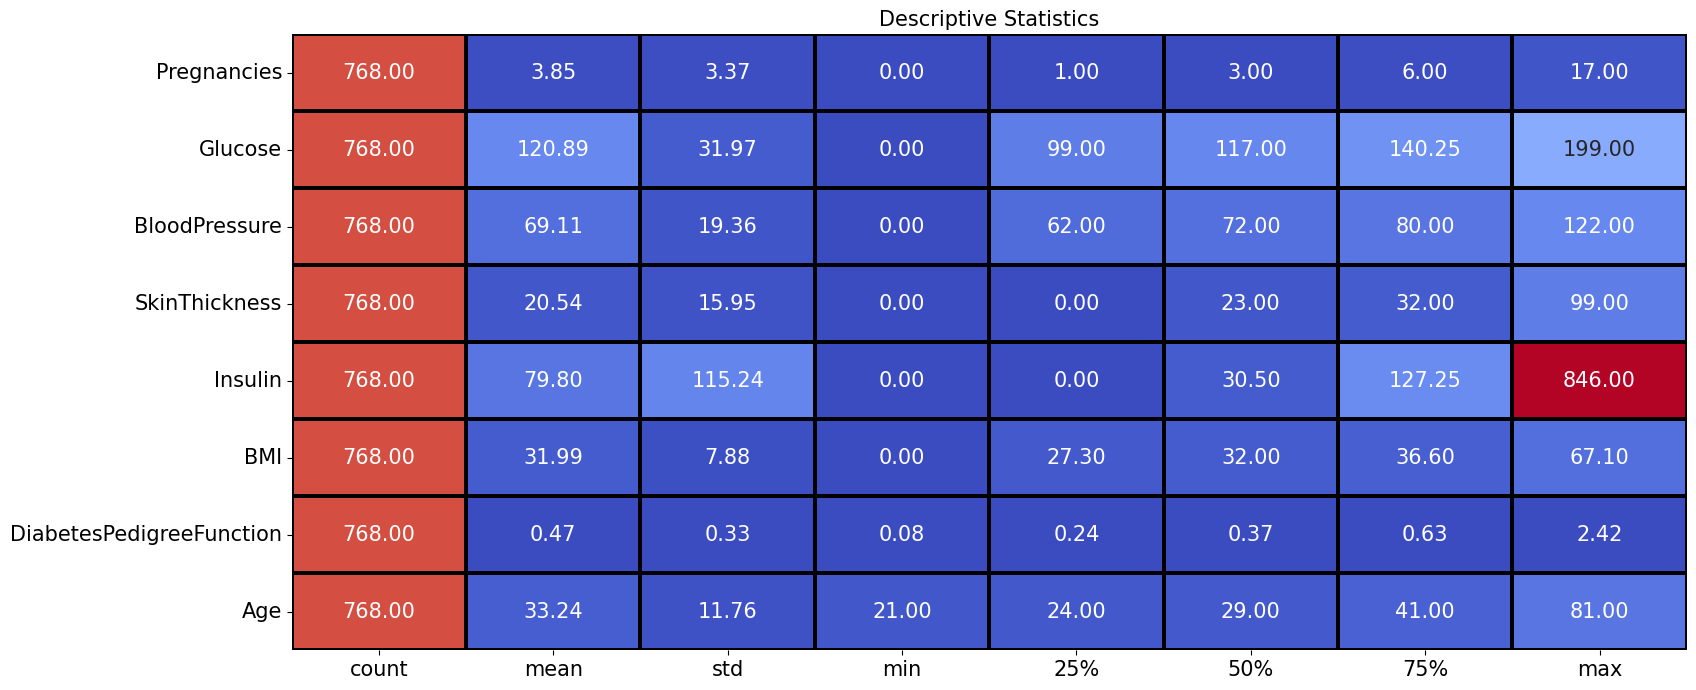

In [ ]:
def descriptive_stats(df):
    desc = df.describe().T
    desc_df = pd.DataFrame(index=df.columns, columns=desc.columns, data=desc)
    f, ax = plt.subplots(figsize=(18, 8))
    sns.heatmap(desc_df,
                annot=True,
                cmap="coolwarm",  # Specify the colormap here
                fmt=".2f",
                ax=ax,
                linecolor="black",
                linewidths=1.5,
                cbar=False,
                annot_kws={"size": 15})
    plt.xticks(size=15)
    plt.yticks(size=15, rotation=0)
    plt.title("Descriptive Statistics", size=15)
    plt.show()

descriptive_stats(df[num_cols])


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

def tar_var_summary(df, tar_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']

    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    x = [str(i) for i in df[tar_var].value_counts().index]
    y = df[tar_var].value_counts().values.tolist()

    fig.add_trace(go.Bar(x=x, y=y, text=y,
                         textposition="auto",
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='black',
                                               width=2))), row=1, col=1)

    fig.add_trace(go.Pie(labels=df[tar_var].value_counts().keys(),
                         values=df[tar_var].value_counts().values,
                         pull=[0, 0.25],
                         hoverinfo='label',
                         textinfo='percent',
                         textfont_size=20,
                         textposition='auto',
                         marker=dict(colors=colors,
                                     line=dict(color='black',
                                               width=2))), row=1, col=2)

    fig.update_layout(title={'text': "Distribution of the Target Variable",
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_dark')

    iplot(fig)

tar_var_summary(df, "Outcome")


In [ ]:
def num_var_summary(df, num_var):
    fig = make_subplots(rows = 1, cols = 2,
                       subplot_titles = ("Quantiles", "Distribution"))

    fig.add_trace(go.Box(y = df[num_var],
                         name = str(num_var),
                         showlegend = False,
                         marker_color = "#A6D0DD"),
                         row = 1, col = 1)

    fig.add_trace(go.Histogram(x = df[num_var],
                               xbins = dict(start = df[num_var].min(),
                                            end = df[num_var].max()),
                               showlegend = False,
                               name = str(num_var),
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 2)

    fig.update_layout(title={'text': num_var.capitalize(),
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')

    iplot(fig)

In [ ]:
for i in num_cols:
    num_var_summary(df, i)

In [ ]:
def num_features(df, num_var, tar_var):
    x0 = df[df[tar_var]==0][num_var]
    x1 = df[df[tar_var]==1][num_var]

    trace1 = go.Histogram(x = x0,
                               name = "0",
                               opacity = 0.75,
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))

    trace2 = go.Histogram(x = x1,
                               name = "1",
                               opacity = 0.75,
                               marker=dict(color="#A6D0DD",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))

    data = [trace1, trace2]

    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')

    fig = go.Figure(data=data, layout=layout)

    iplot(fig)

In [ ]:
for i in num_cols:
    num_features(df, i, "Outcome")

In [ ]:
def df_corr(df):
    plt.figure(figsize = (12,10))
    corr = df.corr()
    matrix = np.triu(corr)
    sns.heatmap(corr, annot = True, mask = matrix, cmap = "gist_gray")

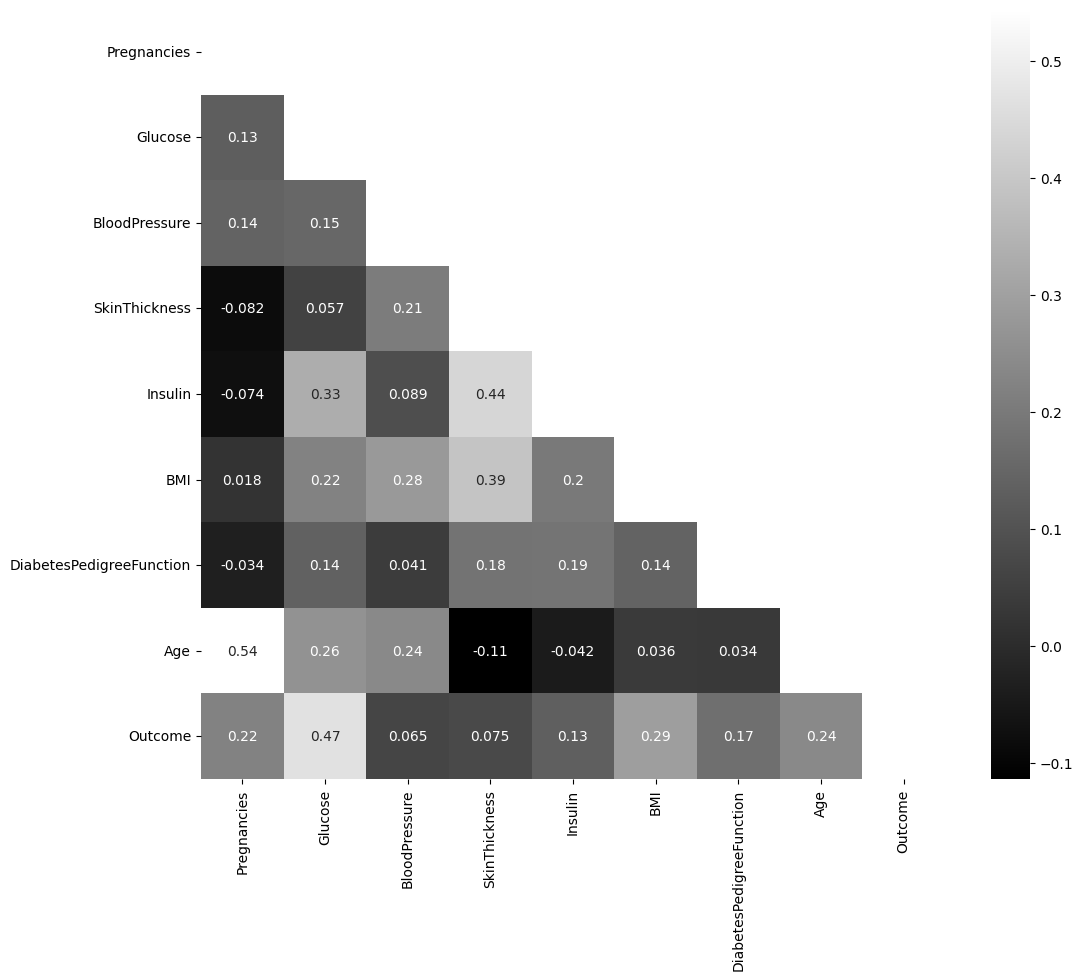

In [ ]:
df_corr(df)

In [ ]:
colors = ['#654E92','#6C9BCF','#A5C0DD','#EBD8B2']
fig = go.Figure(data=go.Splom(dimensions=[dict(label=col,
                                               values=df[col]) for col in
                                          df[num_cols].select_dtypes(include = ['int', 'float']).columns
                                         ],
                showupperhalf = True,
                text = df['Outcome'],
                marker = dict(color = [colors[i] for i in df['Outcome']. \
                                     astype('category').cat.codes],
                            showscale = False,
                            opacity = 0.65)
                             )
               )

fig.update_layout(title = {'text': 'Pairwise Relationships by Outcome',
                          'xanchor': 'center',
                          'yanchor': 'top',
                          'x': 0.5,
                          'y': 0.95},
                  width = 950,
                  height = 950,
                  template = 'plotly_dark')

iplot(fig)

In [ ]:
def detect_outliers(df, num_var):

    trace0 = go.Box(
        y = df[num_var],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = '#a2b9bc'),
        line = dict(
            color = '#6b5b95')
    )

    trace1 = go.Box(
        y = df[num_var],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = '#b2ad7f'),
        line = dict(
            color = '#feb236')
    )

    trace2 = go.Box(
        y = df[num_var],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = '#b5e7a0',
            outliercolor = '#878f99',
            line = dict(
                outliercolor = '#d64161',
                outlierwidth = 2)),
        line = dict(
            color = '#86af49')
    )

    trace3 = go.Box(
        y = df[num_var],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = '#6b5b95'),
        line = dict(
            color = '#ff7b25')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(num_var)
    )

    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')

    fig = go.Figure(data=data,layout=layout)

    iplot(fig)

In [ ]:
for i in num_cols:
    detect_outliers(df, i)

# Observations from Exploratory Data Analysis

* There are no highly correlated independent variables.
* The presence of outliers that can affect the models draw attention.
* Despite the fact that some values like Glucose, BMI etc. that can't have the value 0, we see that these features contain 0's. So, we should handle them in the feature engineering step.

# Data Preprocessing

In [ ]:
missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[missing_values] = np.where(df[missing_values] == 0, np.nan, df[missing_values])

<Axes: >

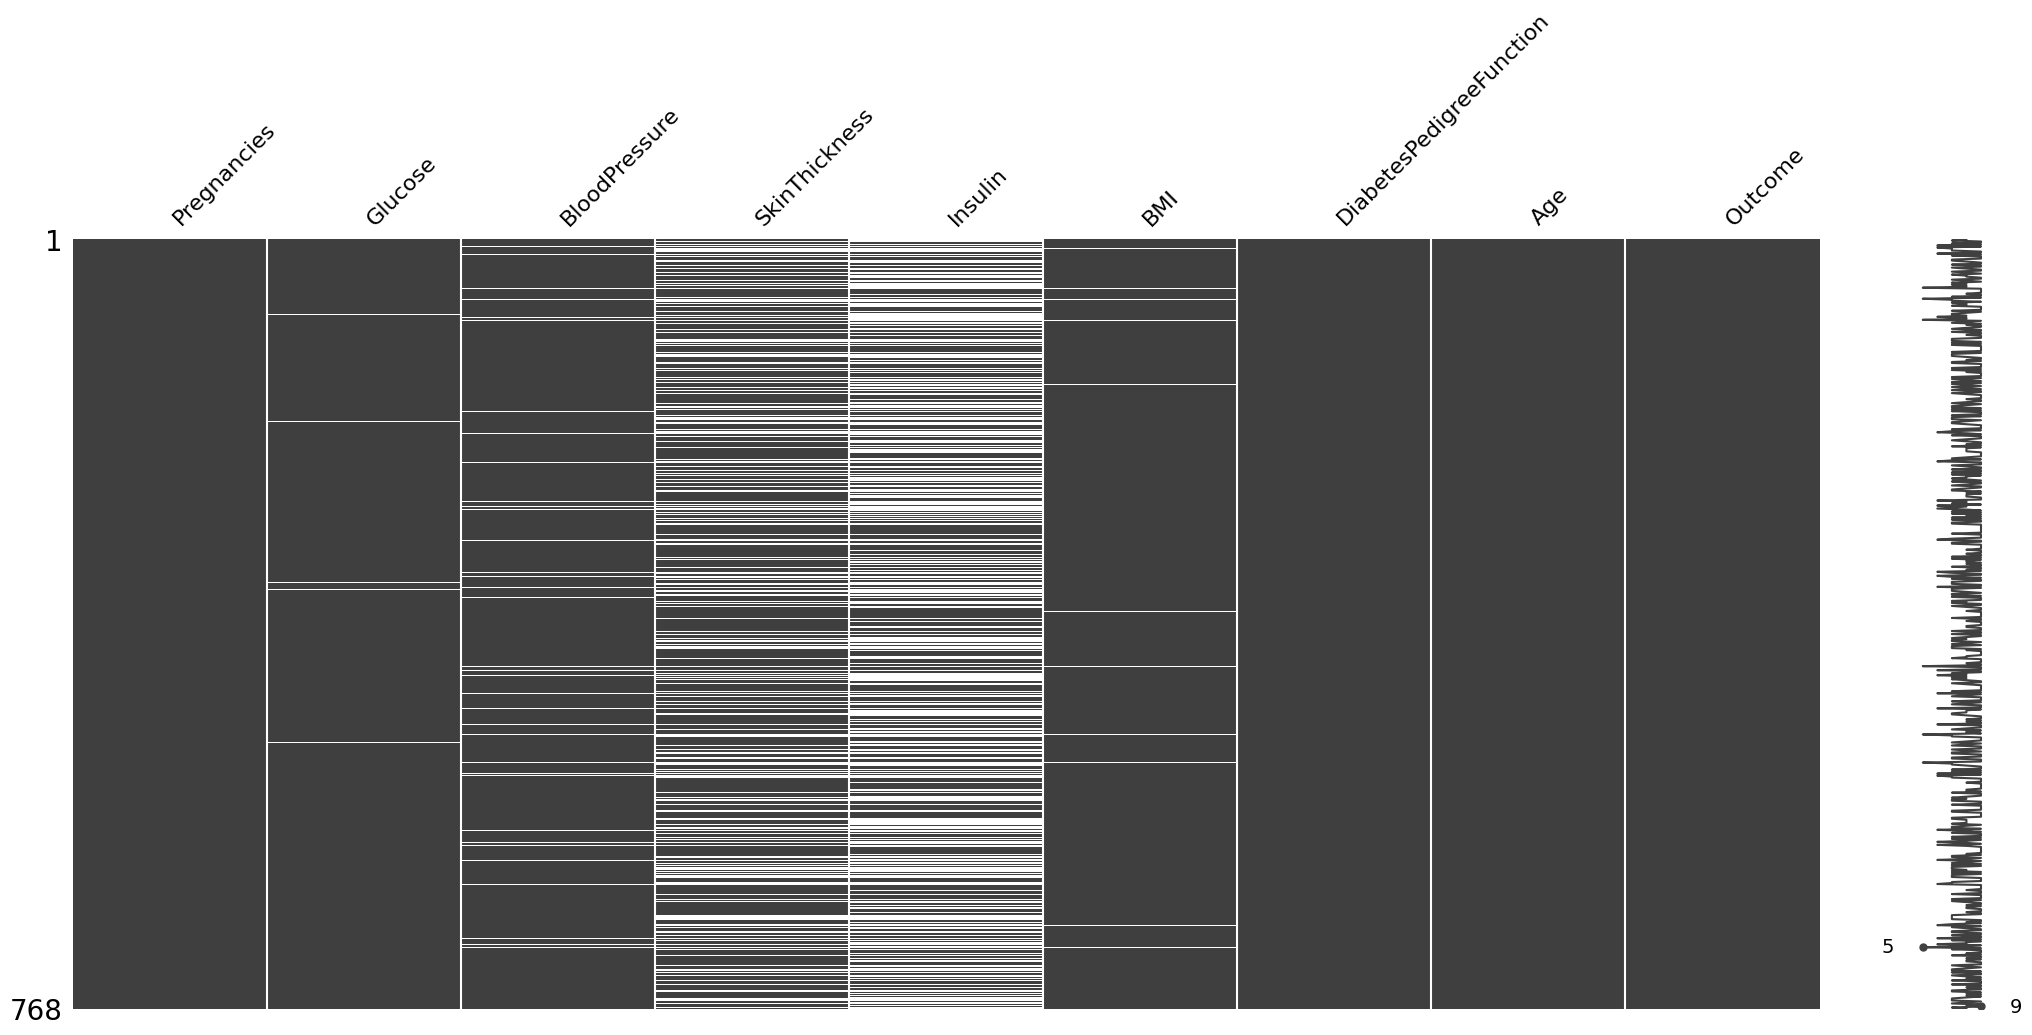

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percentage(df)

,Total,Percent
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65


In [ ]:
df.loc[df.Age.between(18,31), "AgeGroup"] = "Young"
df.loc[df.Age.between(31,46), "AgeGroup"] = "MiddleAge"
df.loc[df.Age.between(46,66), "AgeGroup"] = "LateMiddleAge"
df.loc[df.Age >= 66,"AgeGroup"] = "Old"

In [ ]:
df['Insulin'] = df['Insulin'].fillna(df.groupby(["AgeGroup", "Outcome"])['Insulin'].transform('median'))
df['Insulin'] = df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median'))
df['SkinThickness'] = df['SkinThickness'].fillna(df.groupby('Outcome')['SkinThickness'].transform('median'))
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby("Outcome")["BloodPressure"].transform('median'))
df['BMI'] = df['BMI'].fillna(df.groupby(["AgeGroup", "Outcome"])['BMI'].transform('median'))
df["Glucose"] = df["Glucose"].fillna(df.groupby("Outcome")["Glucose"].transform('median'))

In [ ]:
df.loc[df.BMI < 18.5, "BMIClass"] = "Underweight"
df.loc[df.BMI.between(18.5, 25.0), "BMIClass"] = "Normal"
df.loc[df.BMI.between(25.0, 30.0), "BMIClass"] = "Overweight"
df.loc[df.BMI.between(30.0, 35.0), "BMIClass"] = "Obese"
df.loc[df.BMI >= 35.0 , "BMIClass"] = "ExtremelyObese"

df.loc[df.Insulin < 120  , 'InsulinThreshold'] ="Below"
df.loc[df.Insulin >= 120 , 'InsulinThreshold'] ="Above"

df.loc[df.Pregnancies > 0, "HasChild"] = "Yes"
df.loc[df.Pregnancies == 0, "HasChild"] = "No"

df.loc[df.BMI < 30, "IsObese"] = "No"
df.loc[df.BMI >= 30, "IsObese"] = "Yes"

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMIClass,InsulinThreshold,HasChild,IsObese
0,6,148.0,72.0,35.0,199.5,33.6,0.627,50,1,LateMiddleAge,Obese,Above,Yes,Yes
1,1,85.0,66.0,29.0,115.0,26.6,0.351,31,0,MiddleAge,Overweight,Below,Yes,No
2,8,183.0,64.0,32.0,168.0,23.3,0.672,32,1,MiddleAge,Normal,Above,Yes,No
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young,Overweight,Below,Yes,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,MiddleAge,ExtremelyObese,Above,No,Yes


In [ ]:
missing_percentage(df)

,Total,Percent


In [ ]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in df[num_cols].columns:
    replace_with_thresholds(df, col, q1 = 0.1, q3 = 0.9)

In [ ]:
def cat_var_summary(df, cat_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']

    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    x = [str(i) for i in df[cat_var].value_counts().index]
    y = df[cat_var].value_counts().values.tolist()

    fig.add_trace(go.Bar(x = x, y = y, text = y,
                         textposition = "auto",
                       showlegend = False,
                        marker=dict(color=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=1)

    fig.add_trace(go.Pie(labels = df[cat_var].value_counts().keys(),
                         values = df[cat_var].value_counts().values,
                         hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 20,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=2)


    fig.update_layout(title={'text': cat_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')

    iplot(fig)

In [ ]:
for i in ["BMIClass", "AgeGroup", "InsulinThreshold", "HasChild", "IsObese"]:
    cat_var_summary(df, i)

In [ ]:
cat_cols = ["BMIClass", "AgeGroup", "InsulinThreshold", "HasChild", "IsObese"]
df = pd.get_dummies(df, columns=cat_cols)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMIClass_ExtremelyObese,...,AgeGroup_LateMiddleAge,AgeGroup_MiddleAge,AgeGroup_Old,AgeGroup_Young,InsulinThreshold_Above,InsulinThreshold_Below,HasChild_No,HasChild_Yes,IsObese_No,IsObese_Yes
0,6.0,148.0,72.0,35.0,199.5,33.6,0.627,50.0,1,0,...,1,0,0,0,1,0,0,1,0,1
1,1.0,85.0,66.0,29.0,115.0,26.6,0.351,31.0,0,0,...,0,1,0,0,0,1,0,1,1,0
2,8.0,183.0,64.0,32.0,168.0,23.3,0.672,32.0,1,0,...,0,1,0,0,1,0,0,1,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0,...,0,0,0,1,0,1,0,1,1,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1,1,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [ ]:
from sklearn.model_selection import train_test_split

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

* Initially, we checked the missing values that can't be directly discerned. Then filled them with median.
* Created new features to increase the accuracy.
* Replaced outliers in accordance with a low threshold value.
* Scaled data and split it into test and train data.
* Now, we are ready for modeling.

# Model Building

In [ ]:
def model_performance(model):
    y_pred = model.fit(X_train, y_train).predict(X_test)

    fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Confusion Matrix", "Metrics"))

    confusion = confusion_matrix(y_test, y_pred)
    tp = confusion[1,1]
    fn = confusion[1,0]
    fp = confusion[0,1]
    tn = confusion[0,0]
    accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    precision =  (tp/(tp+fp))
    recall    =  (tp/(tp+fn))
    f1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    colors = ['#93e4c1', '#3baea0', '#118a7e', '#1f6f78']

    show_metrics = pd.DataFrame(data=[[accuracy , precision, recall, f1_score]])
    show_metrics = show_metrics.T

    fig.add_trace(go.Heatmap(z = confusion  ,x = ["0 (pred)","1 (pred)"],
                         y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2,
                         colorscale="darkmint", showscale  = False),
                         row = 1, col = 1)

    fig.add_trace(go.Bar(x = (show_metrics[0].values),
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                    text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='white'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='white',width=1.5))), row = 1, col = 2)

    fig.update_layout(title={'text': model.__class__.__name__,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')

    iplot(fig)

Model Building for LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
random_state = 42
models = [LogisticRegression(random_state = random_state)]

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression

random_state = 42
models = [LogisticRegression(random_state=random_state)]

# Train the Logistic Regression model
model = models[0]
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

Model Building for DecisionTree

In [ ]:
my_max_depth=[2,3,4,5,10]
my_criterion=['gini','entropy']
my_min_samples_lef=[2,5,10,15,20,25]
my_min_samples_split=[2,5,10,15,50,100]

In [ ]:
# number of models
import math
lengths = map(len, [my_max_depth, my_criterion, my_min_samples_lef, my_min_samples_split])
math.prod(lengths)

360

In [ ]:
from sklearn.tree import DecisionTreeClassifier

mytree = DecisionTreeClassifier(random_state=99, class_weight='balanced')


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:

grid=GridSearchCV(estimator=mytree,cv=5,scoring='recall',param_grid=dict(max_depth=my_max_depth,min_samples_leaf=my_min_samples_lef,min_samples_split=my_min_samples_split))

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=99),
             param_grid={'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 50, 100]},
             scoring='recall')

In [ ]:
grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 2}

In [ ]:
results=pd.DataFrame(grid.cv_results_)
results.to_csv("results.csv")

In [ ]:
pwd()

'/content'

In [ ]:
import numpy as np

best_score = grid.best_score_
rounded_best_score = np.round(best_score, 2) * 100
print("Best Score:", rounded_best_score)

Best Score: 87.0


In [ ]:
predicted = grid.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        99
           1       0.75      0.89      0.82        55

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [ ]:
predicted_prob=grid.predict_proba(X_test)
np.round(predicted_prob,3)

array([[0.082, 0.918],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.66 , 0.34 ],
       [0.082, 0.918],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.66 , 0.34 ],
       [0.66 , 0.34 ],
       [0.082, 0.918],
       [0.66 , 0.34 ],
       [0.082, 0.918],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.394, 0.606],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.082, 0.918],
       [0.394, 0.606],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.66 , 0.34 ],
       [0.082, 0.918],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.939, 0.061],
       [0.66 , 0.34 ],
       [0.082, 0.918],
       [0.082, 0.918],
       [0.082, 0.918],
       [0.939, 0.061],
       [0.082, 0.918],
       [0.082, 0.918],
       [0.082, 0.918],
       [0.939, 0.061],
       [0.394, 0.606],
       [0.939, 0.061],
       [0.66 , 0.34 ],
       [0.939, 0.061],
       [0.0

In [ ]:
predicted

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

Model Building for RandomForest



In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced', random_state=23)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on your data
grid_search.fit(X_train, y_train)  # Use X_train and y_train here

# Get the best estimator and its parameters
best_rf_estimator = grid_search.best_estimator_
best_parameters = grid_search.best_params_

# Use the best estimator to make predictions
y_pred = best_rf_estimator.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_parameters)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8571428571428571


In [ ]:
from sklearn.metrics import classification_report

# Assuming you already have y_test and y_pred from the previous code

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.80      0.80      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154

